Importing/installing necessary libraries

In [3]:
pip install pandas-ods-reader


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ezodf: filename=ezodf-0.3.2-py2.py3-none-any.whl size=49000 sha256=4442e6fd5e71e8b11eb53b6c2e5fc3235d40156eb8f1ef2ac2ce0d4bbd1e1e80
  Stored in directory: /root/.cache/pip/wheels/50/09/62/ea2c44e6ffdd067d6c8d3f557af0734a195bd252d6901f23ca
Successfully built ezodf


In [4]:
import numpy as np
import pandas as pd
import os
import pandas_ods_reader as ods

#visualization libaries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Preparation and Cleaning


In [5]:
#Read the ODS file
data = ods.read_ods("/content/drive/MyDrive/Minor_Pollution/output_miss_val.ods", 1)  # Assuming the data is in the first sheet (sheet index starts from 0)

# Assuming "City" is a column in your dataframe, filter the data to only include rows where the "City" column has the value "Delhi"
Delhi_City = data[data["City"] == "Delhi"]

# Display the first few rows of the resulting dataframe
print(Delhi_City.head())

    City        Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO  \
0  Delhi  2015-01-01  313.22  607.98  69.16  36.39  110.59   33.85  15.20   
1  Delhi  2015-01-02  186.18  269.55  62.09  32.87   88.14   31.83   9.54   
2  Delhi  2015-01-03   87.18  131.90  25.73  30.31   47.95   69.55  10.61   
3  Delhi  2015-01-04  151.84  241.84  25.01  36.91   48.62  130.36  11.54   
4  Delhi  2015-01-05  146.60  219.13  14.01  34.92   38.25  122.88   9.20   

    SO2     O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  9.25  41.68    14.36    24.86    9.84  472.0     Severe  
1  6.65  29.97    10.55    20.09    4.29  454.0     Severe  
2  2.65  19.71     3.91    10.23    1.99  143.0   Moderate  
3  4.63  25.36     4.26     9.71    3.34  319.0  Very Poor  
4  3.33  23.20     2.80     6.21    2.96  325.0  Very Poor  


In [7]:
data.describe()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,117.134755,223.165678,33.265458,44.428742,54.032925,41.529518,2.185964,13.948154,44.382949,3.669469,21.834600,1.442696,251.832516
std,80.883996,117.172024,26.401221,16.902077,32.534856,17.434102,2.627594,5.154533,17.646233,2.329412,17.008215,2.380415,115.287698
min,10.240000,19.510000,4.420000,13.430000,1.870000,6.780000,0.190000,2.650000,6.940000,0.220000,1.270000,0.000000,51.000000
25%,57.792500,132.662500,14.095000,30.997500,29.747500,30.980000,0.980000,10.195000,31.910000,1.960000,8.980000,0.110000,153.000000
50%,95.720000,203.710000,24.340000,42.895000,47.080000,37.350000,1.290000,13.260000,41.100000,3.030000,18.670000,0.650000,246.500000
75%,156.372500,293.820000,42.752500,55.730000,70.615000,47.942500,1.930000,17.210000,53.440000,4.745000,28.845000,1.970000,336.500000
max,639.190000,796.880000,158.630000,106.040000,195.810000,166.700000,16.230000,40.750000,136.670000,20.640000,103.000000,23.300000,677.000000


Exploratory Analysis and Visualization


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        1224 non-null   object 
 1   Date        1224 non-null   object 
 2   PM2.5       1224 non-null   float64
 3   PM10        1224 non-null   float64
 4   NO          1224 non-null   float64
 5   NO2         1224 non-null   float64
 6   NOx         1224 non-null   float64
 7   NH3         1224 non-null   float64
 8   CO          1224 non-null   float64
 9   SO2         1224 non-null   float64
 10  O3          1224 non-null   float64
 11  Benzene     1224 non-null   float64
 12  Toluene     1224 non-null   float64
 13  Xylene      1224 non-null   float64
 14  AQI         1224 non-null   float64
 15  AQI_Bucket  1224 non-null   object 
dtypes: float64(13), object(3)
memory usage: 153.1+ KB


In [9]:
data.isna().count()

City          1224
Date          1224
PM2.5         1224
PM10          1224
NO            1224
NO2           1224
NOx           1224
NH3           1224
CO            1224
SO2           1224
O3            1224
Benzene       1224
Toluene       1224
Xylene        1224
AQI           1224
AQI_Bucket    1224
dtype: int64

**Handling missing data**

In [10]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_values_table(Delhi_City)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [12]:
Delhi_City.interpolate(limit_direction="both",inplace=True)


In [13]:
missing_values_table(Delhi_City)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [14]:
Delhi_City['AQI_Bucket'].iloc[0]


'Severe'

In [15]:
for i,each in enumerate(Delhi_City['AQI_Bucket']):
    if pd.isnull(Delhi_City['AQI_Bucket'].iloc[i]):
        if Delhi_City['AQI'].iloc[i]>=0.0 and Delhi_City['AQI'].iloc[i]<=50.0:
            Delhi_City['AQI_Bucket'].iloc[i]='Good'
        elif Delhi_City['AQI'].iloc[i]>=51.0 and Delhi_City['AQI'].iloc[i]<=100.0:
            Delhi_City['AQI_Bucket'].iloc[i]='Satisfactory'
        elif Delhi_City['AQI'].iloc[i]>=101.0 and Delhi_City['AQI'].iloc[i]<=200.0:
            Delhi_City['AQI_Bucket'].iloc[i]='Moderate'
        elif Delhi_City['AQI'].iloc[i]>=201.0 and Delhi_City['AQI'].iloc[i]<=300.0:
            Delhi_City['AQI_Bucket'][i]='Poor'
        elif Delhi_City['AQI'].iloc[i]>=301.0 and Delhi_City['AQI'].iloc[i]<=400.0:
            Delhi_City['AQI_Bucket'].iloc[i]='Very Poor'
        else:
            Delhi_City['AQI_Bucket'].iloc[i]='Severe'

In [16]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,117.134755,223.165678,33.265458,44.428742,54.032925,41.529518,2.185964,13.948154,44.382949,3.669469,21.834600,1.442696,251.832516
std,80.883996,117.172024,26.401221,16.902077,32.534856,17.434102,2.627594,5.154533,17.646233,2.329412,17.008215,2.380415,115.287698
min,10.240000,19.510000,4.420000,13.430000,1.870000,6.780000,0.190000,2.650000,6.940000,0.220000,1.270000,0.000000,51.000000
25%,57.792500,132.662500,14.095000,30.997500,29.747500,30.980000,0.980000,10.195000,31.910000,1.960000,8.980000,0.110000,153.000000
50%,95.720000,203.710000,24.340000,42.895000,47.080000,37.350000,1.290000,13.260000,41.100000,3.030000,18.670000,0.650000,246.500000
75%,156.372500,293.820000,42.752500,55.730000,70.615000,47.942500,1.930000,17.210000,53.440000,4.745000,28.845000,1.970000,336.500000
max,639.190000,796.880000,158.630000,106.040000,195.810000,166.700000,16.230000,40.750000,136.670000,20.640000,103.000000,23.300000,677.000000


In [17]:
fig1=px.line(Delhi_City, x="Date",y="PM2.5")
fig2=px.line(Delhi_City, x="Date",y="PM10")
fig3=px.line(Delhi_City, x="Date",y="NO")
fig4=px.line(Delhi_City, x="Date",y="NO2")
fig5=px.line(Delhi_City, x="Date",y="NH3")
fig6=px.line(Delhi_City, x="Date",y="CO")
fig7=px.line(Delhi_City, x="Date",y="SO2")
fig8=px.line(Delhi_City, x="Date",y="O3")
fig9=px.line(Delhi_City, x="Date",y="Benzene")
fig10=px.line(Delhi_City, x="Date",y="Toluene")
fig11=px.line(Delhi_City, x="Date",y="Xylene")
fig12=px.line(Delhi_City, x="Date",y="AQI")
fig13=px.line(Delhi_City, x="Date",y="AQI_Bucket")
fig1.show()
fig13.show()
fig12.show()

In [18]:
# now to separate the dataset yearwise using the pandas dateTimeIndex function
data['Date'] = pd.to_datetime(data.Date)
data['year'] = pd.DatetimeIndex(data.Date).year

In [19]:
#  taking out the DELHI dataset
city_delhi = data[data.City == 'Delhi']

In [20]:
# now seperating the data annually
# like for 2015
city_delhi_2015 = city_delhi[city_delhi.year == 2015]
# now taking mean of AQI for year 2015
city_delhi_2015_AQI = city_delhi_2015[['AQI']].mean()
city_delhi_2015_AQI

AQI    312.816901
dtype: float64

In [21]:
# similarly for year 2016
city_delhi_2016 = city_delhi[city_delhi.year == 2016]
city_delhi_2016_AQI = city_delhi_2016[['AQI']].mean()
city_delhi_2016_AQI

AQI    463.0
dtype: float64

In [22]:
# similarly for year 2017
city_delhi_2017 = city_delhi[city_delhi.year == 2017]
city_delhi_2017_AQI = city_delhi_2017[['AQI']].mean()
city_delhi_2017_AQI

AQI    332.402062
dtype: float64

In [23]:
# similarly for year 2018
city_delhi_2018 = city_delhi[city_delhi.year == 2018]
city_delhi_2018_AQI = city_delhi_2018[['AQI']].mean()
city_delhi_2018_AQI

AQI    249.158904
dtype: float64

In [24]:
# similarly for year 2019
city_delhi_2019 = city_delhi[city_delhi.year == 2019]
city_delhi_2019_AQI = city_delhi_2019[['AQI']].mean()
city_delhi_2019_AQI

AQI    232.10411
dtype: float64

In [25]:
# similarly for year 2020
city_delhi_2020 = city_delhi[city_delhi.year == 2020]
city_delhi_2020_AQI = city_delhi_2020[['AQI']].mean()
city_delhi_2020_AQI

AQI    181.672131
dtype: float64

In [26]:
year = ['2015','2016','2017','2018','2019','2020']


In [27]:
AQI_data_delhi = [297.024658,301.369863,256.727528,249.158904,232.10411,181.672131]


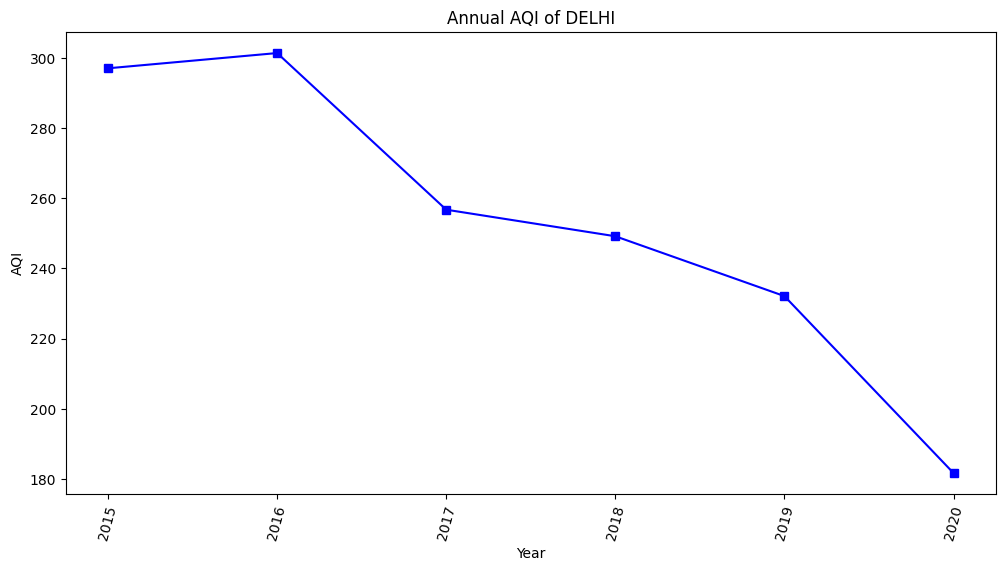

In [28]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.plot(year,AQI_data_delhi,'s-b')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.title('Annual AQI of DELHI');

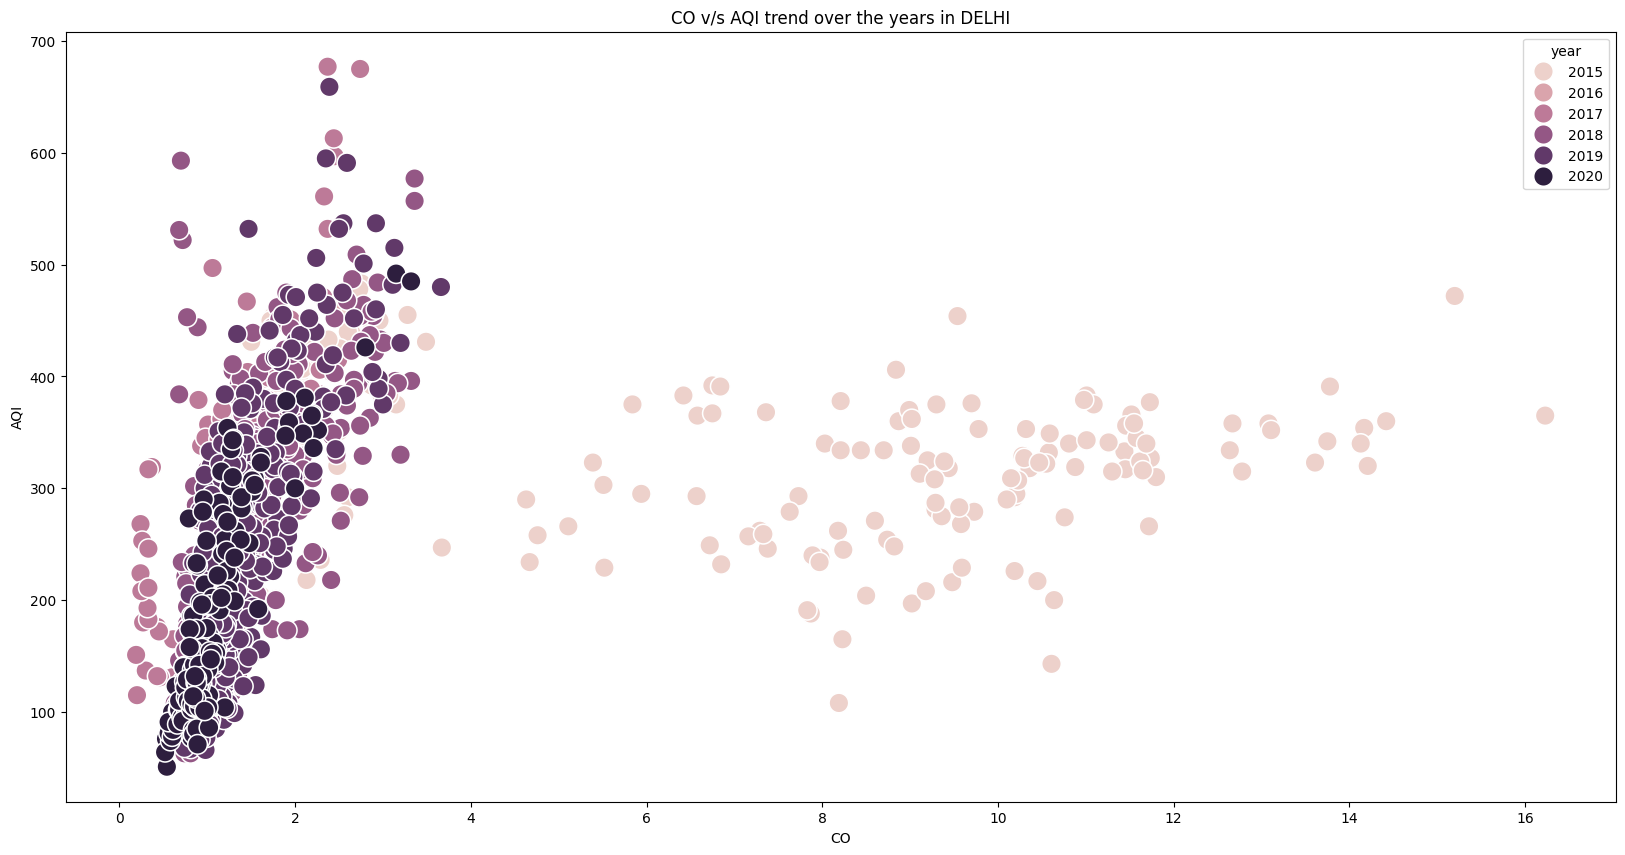

In [29]:
plt.figure(figsize=(20,10))
# using scatter plot to find out the relationship
plt.title('CO v/s AQI trend over the years in DELHI')
sns.scatterplot(x='CO', y='AQI',
               hue='year',
               s=200,
               data=city_delhi);

In [30]:
!pip install odfpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer  # Import SimpleImputer to handle missing values

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Define features and target
X = data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
y = data['AQI']

# Check for missing values in the target variable
missing_values = y.isnull().sum()
if missing_values > 0:
    print(f'Target variable contains {missing_values} missing values. Please handle missing values before proceeding.')
else:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Handle missing values using SimpleImputer for features
    imputer = SimpleImputer(strategy='mean')  # Impute missing values with mean
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train_imputed, y_train)

    # Make predictions
    y_pred = model.predict(X_test_imputed)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    # Coefficients and Intercept
    coefficients = model.coef_
    intercept = model.intercept_
    print('Coefficients:', coefficients)
    print('Intercept:', intercept)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=a41ad67a72684cd73a43cad72fec937fbc8864d198f720d329503263dc56d3f7
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy
Mean Squared Error: 1243.2254367327816
Coefficients: [ 0.6393338   0.42489034  0.06020323  0.45501879  0.06236934 -0.39734272
  7.39817869  0.29500477 -0.04491395  2.96919844 -0.75773782 -0.62175137]
Intercept: 61.198131990155986


In [43]:
#PredictionNeuralNetwork

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import BatchNormalization

# Create a LabelEncoder
le = LabelEncoder()
# List of columns to encode
columns_to_encode = ['City', 'AQI_Bucket']
# Encode the specified columns
for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])

# Split your dataset into features (X) and the target variable (y)
X = data.drop(columns=['AQI_Bucket', 'Date', 'AQI', 'City'])  # Features
y = data['AQI_Bucket']  # Target variable

# Impute missing values in X with the median
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Split the log-transformed data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but can help with training)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode the target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Define a basic neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())  # Batch normalization after the first Dense layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())  # Batch normalization after the second Dense layer
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with more epochs
model.fit(X_train, y_train, epochs=60, batch_size=100)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training loss: {train_loss:.4f}, Training accuracy: {train_accuracy:.4f}')

Epoch 1/60
10/10 [==============================] - 3s 10ms/step - loss: 1.8709 - accuracy: 0.2421
Epoch 2/60
10/10 [==============================] - 0s 8ms/step - loss: 1.3254 - accuracy: 0.4597
Epoch 3/60
10/10 [==============================] - 0s 7ms/step - loss: 1.0614 - accuracy: 0.5720
Epoch 4/60
10/10 [==============================] - 0s 8ms/step - loss: 0.9180 - accuracy: 0.6404
Epoch 5/60
10/10 [==============================] - 0s 8ms/step - loss: 0.8257 - accuracy: 0.6762
Epoch 6/60
10/10 [==============================] - 0s 11ms/step - loss: 0.7422 - accuracy: 0.7303
Epoch 7/60
10/10 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.7365
Epoch 8/60
10/10 [==============================] - 0s 7ms/step - loss: 0.6515 - accuracy: 0.7487
Epoch 9/60
10/10 [==============================] - 0s 8ms/step - loss: 0.6220 - accuracy: 0.7508
Epoch 10/60
10/10 [==============================] - 0s 9ms/step - loss: 0.5962 - accuracy: 0.7865
Epoch 11/60
10/10

In [33]:
# LinearRegression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data from the ODS file
data = pd.read_excel("/content/drive/MyDrive/Minor_Pollution/output_miss_val.ods", engine='odf')

# Selecting features (X) and target variable (y)
X = data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
y = data['AQI']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 1243.2254367327816
Coefficients: [ 0.6393338   0.42489034  0.06020323  0.45501879  0.06236934 -0.39734272
  7.39817869  0.29500477 -0.04491395  2.96919844 -0.75773782 -0.62175137]
Intercept: 61.198131990155986


Text(0, 0.5, 'Predicted Y')

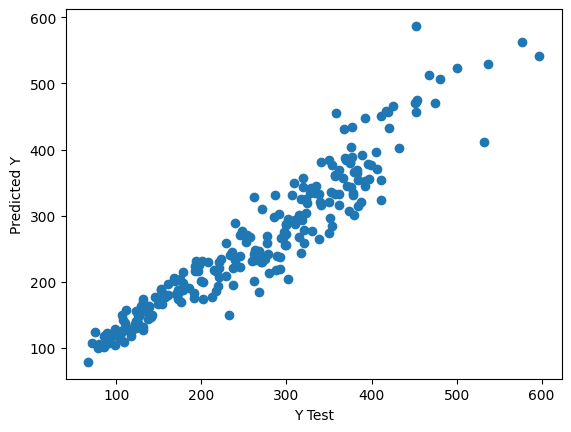

In [34]:
predictions = model.predict(X_test)

plt.scatter(y_test,predictions)

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the data from the ODS file
data = pd.read_excel("/content/drive/MyDrive/Minor_Pollution/output_miss_val.ods", engine='odf')

# Selecting features (X) and target variable (y)
X = data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
y = data['AQI']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Decision Tree Regression model
model = DecisionTreeRegressor()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Feature importances
print("Feature Importances:", model.feature_importances_)


Mean Squared Error: 1540.1224489795918
Feature Importances: [0.89278976 0.03937529 0.00750059 0.00305656 0.00394038 0.00684842
 0.0193347  0.00332342 0.01169335 0.00434033 0.00343114 0.00436607]


In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your data into 'data' dataframe

# Create a LabelEncoder
le = LabelEncoder()
# List of columns to encode
columns_to_encode = ['City', 'AQI_Bucket']
# Encode the specified columns
for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])

# Split your dataset into features (X) and the target variable (y)
X = data.drop(columns=['AQI_Bucket', 'Date', 'AQI', 'City'])  # Features
y = data['AQI_Bucket']  # Target variable

# Impute missing values in X with the median
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')


# Predictions on the training set
train_pred = clf.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, train_pred)
print(f'Training accuracy: {train_accuracy:.4f}')


Test accuracy: 0.8163
Training accuracy: 1.0000


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data from the ODS file
data = pd.read_excel("/content/drive/MyDrive/Minor_Pollution/output_miss_val.ods", engine='odf')

# Selecting features (X) and target variable (y)
X = data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
y = data['AQI']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Feature Importances
print("Feature Importances:", model.feature_importances_)


Mean Squared Error: 744.0118289795918
Feature Importances: [0.85224985 0.08689475 0.00493747 0.00380047 0.00275543 0.00735878
 0.01504077 0.00460566 0.00865199 0.00371744 0.00444554 0.00554184]
